In [3]:

import numpy as np


class TuringMachine:
 
   #initialize the Turing Machine, read the program and input
   def __init__(self, program, input_tape, N, state=0):
     self.trf = {}
     self.state = str(state)
     self.tape = ''.join(['_']*N)
     self.head = N // 2   # head is positioned in the middle
     self.tape = self.tape[:self.head] + input_tape + self.tape[self.head:]
     for line in program.splitlines():
       s, a, r, d, s1 = line.split(' ')
       self.trf[s,a] = (r, d, s1)

   #step through a program
   def step(self,counter):
     if self.state != 'H':
        # assert self.head >= 0 and self.head < len(self.tape) here
        a = self.tape[self.head]
        action = self.trf.get((self.state, a))
        if action:
           r, d, s1 = action
           self.tape = self.tape[:self.head] + r + self.tape[self.head+1:]
           if d != '*':
              self.head = self.head + (1 if d == 'r' else -1)
           self.state = s1
           #if counter%1000==0:
               #print(self.tape.replace('_', ''), self.state,counter)
               #print(self.tape, self.state,counter)
           #print(self.tape.replace('_', ''), self.state,counter)
           #print(self.tape, self.state,counter)
 
   #run a program
   def run(self, max_iter=9999999999,counter=0):
      iter = 0
      while self.state != 'H' and iter < max_iter: # prevent infinite loop
          self.step(counter)
          iter += 1
          counter=iter
      #print(self.tape, self.state, iter)
      #print(self.tape.replace('_', ''), self.state,iter)
      return iter

In [6]:
N = 1000 # tape length, initialize to a large value if you need it
numax = 2**9

program = open('4.2prog_factoring.txt').read()


complexity = []
filename = 'complexity.txt'
file = open(filename,'a')

for i in range(4,numax):
    input_tape = format(i,'b')
    tm = TuringMachine(program, input_tape, N)
    steps = tm.run()
    pair = [i,len(input_tape),steps]
    complexity.append(pair)
    file.write(str(i))
    file.write(',')
    file.write(str(len(input_tape)))
    file.write(',')
    file.write(str(steps))
    file.write('\n')
    file.close()
    file = open(filename,'a')
        
    
file.close()
complexity = np.array(complexity)

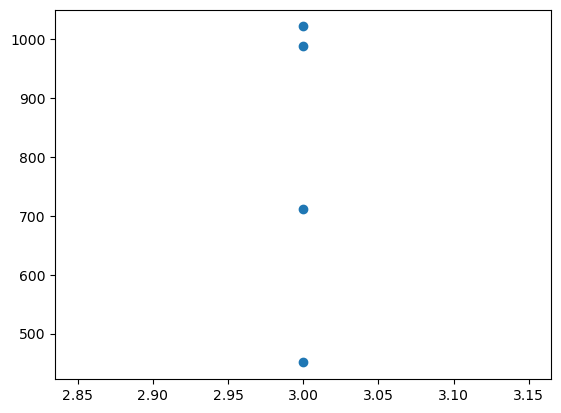

In [7]:
from matplotlib import pyplot as plt

plt.scatter(complexity[:,1],complexity[:,2])
#plt.yscale('log')